<a href="https://colab.research.google.com/github/sofiafc17/taller_3modificado/blob/main/Taller_3_FC_modifico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidad Externado de Colombia 

---

Finanzas Computacionales 
Taller 3

Integrantes del grupo:


*   Sofía Feliciano Capera
*   Julián Samuel Valero Murcia


1. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y con cierre a Dic-2022:

a. Estimar los parámetros del modelo de mercado de las cinco acciones y construir un DataFrame donde se resuman los caculos de: retornos esperados (promedio), volatilidades, betas, retornos estimados (CAPM) y el coeficiente de determinación de cada uno.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import cvxpy as cp
from scipy.stats import norm
import scipy.stats as ss
%pip install --quiet yfinance
import yfinance as yf
warnings.filterwarnings("ignore")

In [2]:
precios = yf.download (("MCD","JNJ","CSCO","MSFT","V"), start="2017-12-01", end="2022-12-31", interval="1Mo") ["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna()
indice = yf.download("^DJI", start="2017-12-01", end="2022-12-21",interval="1Mo") ["Adj Close"]
r_indice = np.log(indice/indice.shift()).dropna()
r_indice_promedio = r_indice.mean()
r_indice_promedio

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


0.004889644163221778

In [3]:
#retornos esperados (promedio)
retornos = np.log(precios/precios.shift()).dropna()
retornos
retornos_promedio= retornos.mean()
retornos_promedio

CSCO    0.006160
JNJ     0.006112
MCD     0.009071
MSFT    0.018183
V       0.010547
dtype: float64

In [4]:
#volatilidades 
volatilidades = retornos.std()
volatilidades

CSCO    0.078245
JNJ     0.051182
MCD     0.055288
MSFT    0.061457
V       0.067957
dtype: float64

In [5]:
#betas
x = r_indice #retornos del indice
y = retornos #retornos del activo 
t = len(x) #cuenta total de elementos 
unos = pd.DataFrame(np.repeat(1,t)) #repeticion de unos, es mejor dejarlo como dataframe
x = pd.DataFrame(x)
y = pd.DataFrame(y)
unos.index = x.index
variables = pd.concat([unos,x], axis=1)
variables
X = variables.T @ variables
Xy = variables.T @ y
sol= np.linalg.solve(X,Xy)
sol= np.transpose(sol)
sol1 = sol[:,1]
sol1

array([0.98278643, 0.59590437, 0.71467965, 0.8150538 , 0.99431843])

In [6]:
#Retorno esperado (CAPM)
capm = sol1*r_indice_promedio
capm

array([0.00480548, 0.00291376, 0.00349453, 0.00398532, 0.00486186])

In [7]:
#Coeficiente de determinación CSCO
slope, intercept, r, p, std_err = stats.linregress(r_indice, retornos["CSCO"])
r2_csco = r**2
r2_csco

0.4534064027437552

In [8]:
#Coeficiente de determinación JNJ
slope, intercept, r, p, std_err = stats.linregress(r_indice, retornos["JNJ"])
r2_jnj = r**2
r2_jnj

0.38959246349947474

In [9]:
#Coeficiente de determinación MCD
slope, intercept, r, p, std_err = stats.linregress(r_indice, retornos["MCD"])
r2_mcd = r**2
r2_mcd

0.4802311397967663

In [10]:
#Coeficiente de determinación MSFT
slope, intercept, r, p, std_err = stats.linregress(r_indice, retornos["MSFT"])
r2_msft = r**2
r2_msft

0.5054858062936238

In [11]:
#Coeficiente de determinación V
slope, intercept, r, p, std_err = stats.linregress(r_indice, retornos["V"])
r2_v = r**2
r2_v

0.6152689984598639

In [12]:
#Dataframe con todos los datos
df = pd.DataFrame(columns = ["Retornos esperados", "Volatilidades","Betas", "Retornos estimados", "R^2"])
df["Retornos esperados"] = retornos_promedio
df["Volatilidades"] = volatilidades
df["Betas"] = sol1
df[ "Retornos estimados"] = capm
df["R^2"] = (r2_csco, r2_jnj, r2_mcd, r2_msft, r2_v)
df

,Retornos esperados,Volatilidades,Betas,Retornos estimados,R^2
CSCO,0.006160,0.078245,0.982786,0.004805,0.453406
JNJ,0.006112,0.051182,0.595904,0.002914,0.389592
MCD,0.009071,0.055288,0.714680,0.003495,0.480231
MSFT,0.018183,0.061457,0.815054,0.003985,0.505486
V,0.010547,0.067957,0.994318,0.004862,0.615269


b. Construya un plano riesgo-retorno en el que se relacionen los retornos estimados del
CAPM y las betas de los activos.

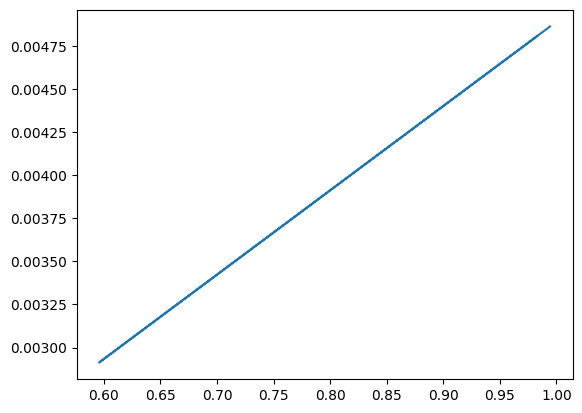

In [13]:
import seaborn as sb
plt.plot(sol1,capm);

c. Punto opcional: estime los retornos de los cinco activos usando el modelo de Fama-
French. Compare los resultados con el modelo CAPM.

MCD

In [15]:
precios = yf.download("MCD", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [16]:
import statsmodels.api as sm
X = r_indice
Y = retornos
X = sm.add_constant(X) #para ingresar el intercepto o cosntante
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     53.59
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           8.48e-10
Time:                        15:52:19   Log-Likelihood:                 108.71
No. Observations:                  60   AIC:                            -213.4
Df Residuals:                      58   BIC:                            -209.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0056      0.005      1.070      0.2

In [18]:
datos = pd.read_csv("/content/datos.csv",sep=";")
factores = pd.concat([datos['Mkt-RF'],datos['SMB'],datos['HML']], axis=1)/100
factores.index = retornos.index
import statsmodels.api as sm
X = factores
Y = retornos
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     15.48
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.88e-07
Time:                        15:53:13   Log-Likelihood:                 107.20
No. Observations:                  60   AIC:                            -206.4
Df Residuals:                      56   BIC:                            -198.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0038      0.005      0.699      0.4

JNJ


In [19]:
precios = yf.download("JNJ", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [20]:
import statsmodels.api as sm
X = r_indice
Y = retornos
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     37.02
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           9.89e-08
Time:                        15:54:12   Log-Likelihood:                 108.52
No. Observations:                  60   AIC:                            -213.0
Df Residuals:                      58   BIC:                            -208.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.005      0.612      0.5

In [21]:
datos = pd.read_csv("/content/datos.csv",sep=";")
factores = pd.concat([datos['Mkt-RF'],datos['SMB'],datos['HML']], axis=1)/100
factores.index = retornos.index
import statsmodels.api as sm
X = factores
Y = retornos
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     9.839
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.61e-05
Time:                        15:54:37   Log-Likelihood:                 106.41
No. Observations:                  60   AIC:                            -204.8
Df Residuals:                      56   BIC:                            -196.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.006      0.312      0.7

CSCO

In [22]:
precios = yf.download("CSCO", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [23]:
import statsmodels.api as sm
X = r_indice
Y = retornos
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     48.11
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           3.75e-09
Time:                        16:00:39   Log-Likelihood:                 86.364
No. Observations:                  60   AIC:                            -168.7
Df Residuals:                      58   BIC:                            -164.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.008      0.179      0.8

In [24]:
datos = pd.read_csv("/content/datos.csv",sep=";")
factores = pd.concat([datos['Mkt-RF'],datos['SMB'],datos['HML']], axis=1)/100
factores.index = retornos.index
import statsmodels.api as sm
X = factores
Y = retornos
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     14.73
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           3.45e-07
Time:                        16:00:43   Log-Likelihood:                 85.698
No. Observations:                  60   AIC:                            -163.4
Df Residuals:                      56   BIC:                            -155.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.008     -0.111      0.9

MSFT

In [25]:
precios = yf.download("MSFT", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [26]:
import statsmodels.api as sm
X = r_indice
Y = retornos
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     59.29
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.95e-10
Time:                        16:00:49   Log-Likelihood:                 103.86
No. Observations:                  60   AIC:                            -203.7
Df Residuals:                      58   BIC:                            -199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0142      0.006      2.512      0.0

In [27]:
datos = pd.read_csv("/content/datos.csv",sep=";")
factores = pd.concat([datos['Mkt-RF'],datos['SMB'],datos['HML']], axis=1)/100
factores.index = retornos.index
import statsmodels.api as sm
X = factores
Y = retornos
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     63.64
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           4.85e-18
Time:                        16:00:53   Log-Likelihood:                 127.24
No. Observations:                  60   AIC:                            -246.5
Df Residuals:                      56   BIC:                            -238.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0106      0.004      2.691      0.0

V

In [28]:
precios = yf.download("V", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna()

[*********************100%***********************]  1 of 1 completed


In [29]:
import statsmodels.api as sm
X = r_indice
Y = retornos
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     92.75
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.23e-13
Time:                        16:01:01   Log-Likelihood:                 105.36
No. Observations:                  60   AIC:                            -206.7
Df Residuals:                      58   BIC:                            -202.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0057      0.006      1.032      0.3

In [30]:
datos = pd.read_csv("/content/datos.csv",sep=";")
factores = pd.concat([datos['Mkt-RF'],datos['SMB'],datos['HML']], axis=1)/100
factores.index = retornos.index
import statsmodels.api as sm
X = factores
Y = retornos
X = sm.add_constant(X) 
model = sm.OLS(Y, X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     24.75
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.52e-10
Time:                        16:01:02   Log-Likelihood:                 102.02
No. Observations:                  60   AIC:                            -196.0
Df Residuals:                      56   BIC:                            -187.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.006      0.501      0.6

2. Escoja 5 acciones que hagan parte del índice Dow Jones (DJI). Con la información histórica de estas acciones para un periodo de al menos 5 años con periodicidad mensual y con cierre a Dic-2022, construya el portafolio óptimo tangente (máximo ratio de Sharpe).

a. Presentar el grafico de pesos y sus medidas de retorno esperado y volatilidad. Nota: tomar solo posiciones largas en el portafolio.

In [ ]:
activos = ["MCD","JNJ","CSCO","MSFT","V"]
precios = yf.download(activos, start = "2017-12-01", end = "2022-12-31", interval ="1Mo")["Adj Close"]
retornos = np.log(precios/precios.shift()).dropna()
mu = retornos.mean()
cov = retornos.cov()
sigma = retornos.std()

[*********************100%***********************]  5 of 5 completed


In [ ]:
n = len(mu)
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [x @ mu == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpt = x.value/x.value.sum()
wpt

array([6.07986210e-22, 2.98023691e-21, 1.83437881e-01, 8.16562119e-01,
       3.97434786e-21])

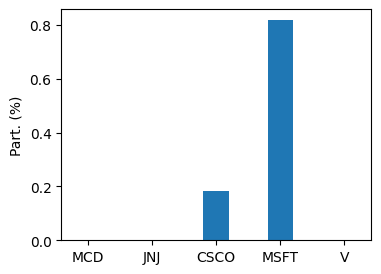

In [ ]:
# Pesos del portafolio tangente de Sharpe
plt.figure(figsize = (4, 3))
plt.bar(activos, x.value/x.value.sum(), width = 0.4)
plt.ylabel("Part. (%)")
plt.show();

In [ ]:
# Retornos históricos del portafolio tangente:
returnspt = retornos @ wpt
rpt = returnspt.mean()
rpt

0.016511212116277894

In [ ]:
#Volatilidad del portafolio
sigmapt = returnspt.std()
sigmapt

0.05500292753070575

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo estándar o paramétrico.

In [ ]:
#confianza del 95% (VaR paramétrico)
rp = returnspt.mean()
sigmap = returnspt.std()

alpha = 0.05
 
VaRp = rp - norm.ppf(1-alpha)*sigmapt 
VaRp

-0.07396055272555244

In [ ]:
#confianza del 99% (VaR paramétrico)
rp = returnspt.mean()
sigmap = returnspt.std()

alpha = 0.01
 
VaRp = rp - norm.ppf(1-alpha)*sigmapt 
VaRp

-0.11144473141080186

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo de estimación histórica.

In [ ]:
#confianza del 95%(VaR histórico)
alpha = 0.05
np.percentile(returnspt, 100 * (alpha))

-0.07036275324655325

In [ ]:
#confianza del 99% (VaR histórico)
alpha = 0.01
np.percentile(returnspt, 100 * (alpha))

-0.09419944352910196

d. Utilice el método de Monte Carlo para construir una muestra aleatoria de 10.000 portafolios. Con esta muestra aleatoria calcular el VaR de simulación del portafolio.

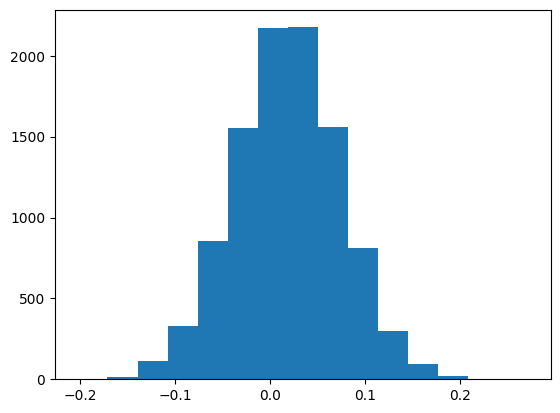

In [ ]:
rands = np.random.normal(rpt,sigmapt, 10000);
VaR = plt.hist(rands,bins = "sturges"); 

In [ ]:
#confianza del 95% (VaR simulación)
np.percentile(rands, 100 * (0.05))

-0.0741938733869054

In [ ]:
#confianza del 99% (VaR simulación)
np.percentile(rands, 100 * (0.01))

-0.113170368350391

e. ¿Se encuentran diferencias significativas entre el VaR de simulación y el VaR de paramétrico?

RTA:Como podemos observas el var parametrico de indice de confianza 95% es igual a -0.07396 y el simulado es de -0.07329 esto quiere decir que a pesar de que no es una gran diferencia el de simulacion es menor esto puede ser porque el parametrico se basa en suposiciones teoricas.
Por el lado de los VaR de indice de confianza 99% podemos observar que el parametrico es -0.09419 y el simulado es -0.11115 en este caso en especifico el parametrico es mayor que el simulado pero por una gran cantidad por lo mismo que este se bada en suposicione teoricas.

3. Los precios de activos riesgos en el mercado describen un proceso estocástico {𝑆𝑡}𝑡≥0 que satisface.

𝑺𝒕 = 𝑺𝟎 𝐞𝐱𝐩{(𝝁– 𝟏/𝟐𝝈𝟐)𝒅𝒕 + 𝝈 𝒅𝑾𝒕}


a. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022, estime los parámetros 𝜇 y 𝜎. Utilice el método de Monte Carlo para generar una muestra aleatoria de 10.000 posibles valores del precio del activo en el instante 𝒕 = 𝟏. Presente gráficamente las primeras 20 trayectorias del proceso.

In [ ]:
activos3 = ["MCD"]
activos3 = yf.download(activos3, start='2017-12-01', end='2022-12-31', interval='1Mo')['Adj Close']
retornos = np.log(activos3/activos3.shift()).dropna()
mu3 = retornos.mean()
sigma3 = retornos.std()
activos3

[*********************100%***********************]  1 of 1 completed


Date
2017-12-01    152.040527
2018-01-01    151.174927
2018-02-01    139.338120
2018-03-01    139.010696
2018-04-01    148.842209
                 ...    
2022-08-01    248.069107
2022-09-01    228.130585
2022-10-01    269.576508
2022-11-01    269.705048
2022-12-01    262.017181
Name: Adj Close, Length: 61, dtype: float64

In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

In [ ]:
T = 1 
mu = mu3*12
sigma = sigma3*np.sqrt(12)
S0 = activos3.tail(1)
NS = 100
M = 12 # Partición del año en meses
St = PathsGBM(S0,mu,sigma,T,NS,M)

In [ ]:
St

array([[262.0171814 , 258.57005859, 249.25592208, ..., 343.89514327,
        340.69934157, 338.14661592],
       [262.0171814 , 267.28803683, 263.14356176, ..., 314.69895131,
        338.99878422, 342.56388185],
       [262.0171814 , 262.88948546, 258.20130879, ..., 221.74366801,
        228.21734205, 248.46413384],
       ...,
       [262.0171814 , 289.11186727, 273.8099708 , ..., 337.66425403,
        324.99501146, 328.76253952],
       [262.0171814 , 248.37982436, 249.44208677, ..., 272.49348615,
        271.96167458, 269.69144784],
       [262.0171814 , 298.9582521 , 315.53434019, ..., 373.40663433,
        376.17786316, 391.62075069]])

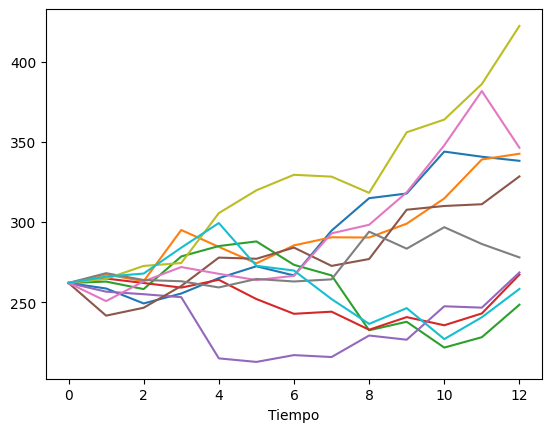

In [ ]:
plt.plot(np.transpose(St[:10])) 
plt.xlabel("Tiempo");

b. Construya el histograma de los precios y retornos al final del periodo (𝑡 = 1). ¿qué puede concluir de la forma de los histogramas?


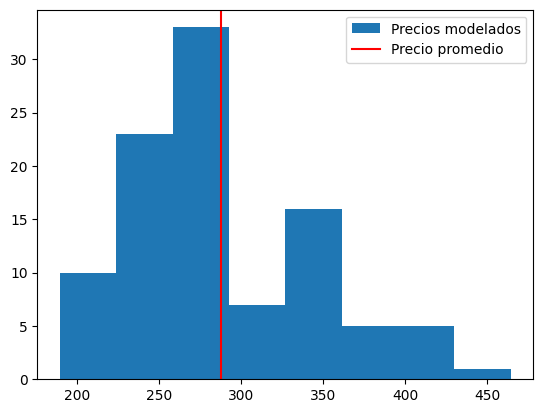

In [ ]:
#Histograma precios 
plt.hist(St[:,-1], bins= "sturges", label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();

In [ ]:
#Retornos simulados
st = pd.DataFrame(St.T)
st_rt = np.log(st/st.shift()).dropna()
st_rt = st_rt.to_numpy()
st1 = st_rt[-1,:]

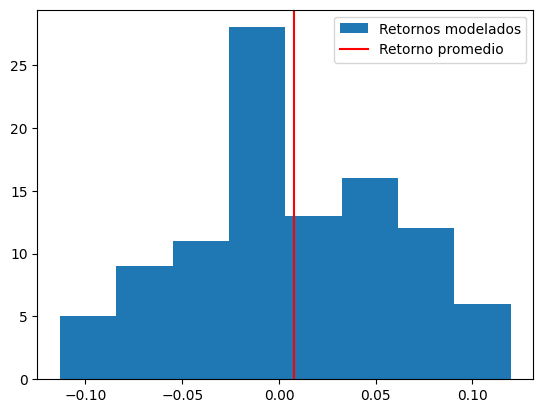

In [ ]:
#Histograma retornos
plt.hist(st1, bins= "sturges", label='Retornos modelados')
plt.axvline(st1.mean(), color='r', label='Retorno promedio')
plt.legend();

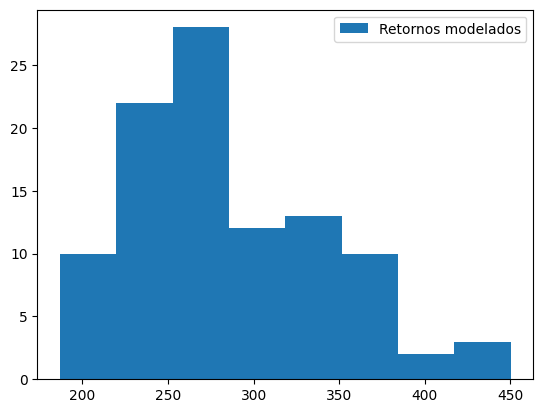

In [ ]:
plt.hist(St[:,-2], bins= "sturges", label='Retornos modelados')
plt.legend();

RTA:como podemos observar en los histogramas tienen una distirbucion normal porque tienen forma de campana y simetrica, por esto tiene una frecuencia máxima en la media y disminuye gradualmente hacia los valores extremos a ambos lados de la media.Ademas la linea base es asintonica porque se acerca al eje horizontal pero nunca lo alcanza.La distibucion de la simulacion se acercara mas a la distibucion normal.

c. Demuestre que el valor del precio simulado de la acción en T converge a 𝑆𝑇 exp{𝜇 𝑇}.

In [ ]:
S0*np.exp(mu*T)

Date
2022-12-01    292.148628
Name: Adj Close, dtype: float64

In [ ]:
St[:,-1].mean()

287.71868415196474

Debido al número de trayectorias tan bajo (NS=100) el valor del precio estimado y el simulado difieren ligeramente, sin embnargo, los valores hallados 292.14 y 290.51 son parecidos y si se aumentan las trayectorias de la simulación se vería claramente como el valor simulado convergería en el estimado.

d. Calcule la probabilidad de que el precio de la acción sea inferior a 𝑆0.

In [ ]:
initial_price = activos3.iloc[0]
x = np.log(S0/initial_price)
prob = norm.cdf(x, mu3, sigma3)
days = len(activos3)
prob_period = prob * days
prob_period

array([61.])

Rta/ la probabilidad de que el precio de la accieon sea inferior a S0 es de 61%

4. Un tipo de proceso estocástico asociados al movimiento Browniano y que se utilizan ampliamente en finanzas son los llamados procesos de reversión a la media. Dentro de estos se encuentra el proceso Ornstein-Uhlenbeck, que es un proceso 𝑋𝑡 que satisface:

𝑿𝒕+𝒅𝒕 = 𝑿𝒕 + (𝝁– 𝑿𝒕)𝒅𝒕 + 𝝈(𝑾𝒕+𝒅𝒕 − 𝑾𝒕)

a. Utilice el método de Monte Carlo para realizar una simulación de 10000 posibles trayectorias (NS) de este proceso considerando los siguientes valores: 𝑿𝟎 = 𝟏, 𝝁 = 𝟑, 𝝈 = 𝟎. 𝟑, 𝑻 = 𝟓, 𝑵𝑺 = 𝟏𝟎𝟎, 𝒅𝒕 = 𝑻/𝒎. Presente gráficamente los resultados para las primeras 10 trayectorias del proceso.

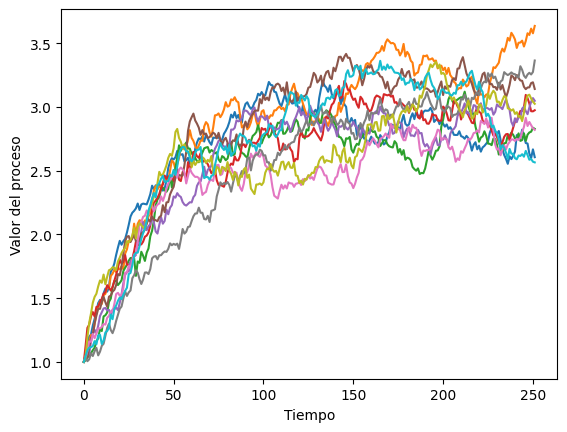

In [ ]:
def PathsOU(x0, mu, sigma, k, T, dt, NS): 

    paths = int(T/dt)
    y = np.zeros((NS, paths))
    for i in range(NS):
        x = np.zeros(paths)
        x[0] = x0
        for j in range(1, paths):
            x[j] = x[j-1] + k*(mu-x[j-1])*dt + sigma*np.sqrt(dt)*np.random.normal()
        y[i] = x
    return y

x0 = 1             
mu = 3               
sigma = 0.3       
k = 1                
T = 5               
dt = T/252           
NS = 100           # Trayectorias 

y = PathsOU(x0, mu, sigma, k, T, dt, NS)

plt.plot(np.transpose(y[:10]))
plt.xlabel("Tiempo")
plt.ylabel("Valor del proceso")
plt.show()


b. A partir de los observado en las simulaciones realizadas en el punto anterior, ¿qué puede concluir acerca del valor esperado y la varianza del proceso Ornstein-Uhlenbeck en el largo plazo?

RTA:Se puede concluir que el valor esperado converge a su valor de equilibrio, mientras que la varianza del proceso disminuye a medida que el tiempo avanza y el proceso se acerca a su valor de equilibrio. 

c. De acuerdo con la ecuación 1, ¿cuál es la distribución de probabilidad del proceso Ornstein-Uhlenbeck?

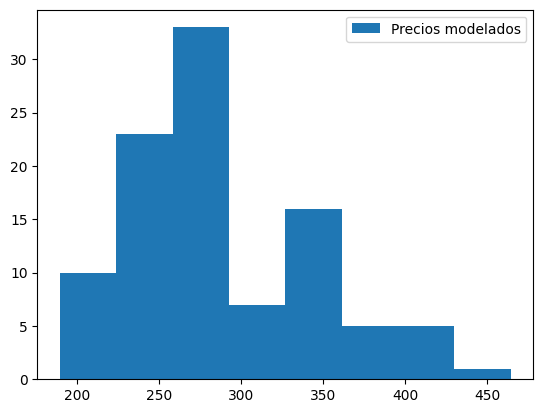

In [ ]:
dp_ou = y[:,-1]
plt.hist(St[:,-1], bins= "sturges", label='Precios modelados')
plt.legend();

d. El proceso Ornstein-Uhlenbeck se suelen utilizar para modelar la dinámica de la tasa corta de interés. Por ejemplo, si 𝒓𝒕 denota el valor de la tasa corte de interés en el mercado, esta se puede modelar como:

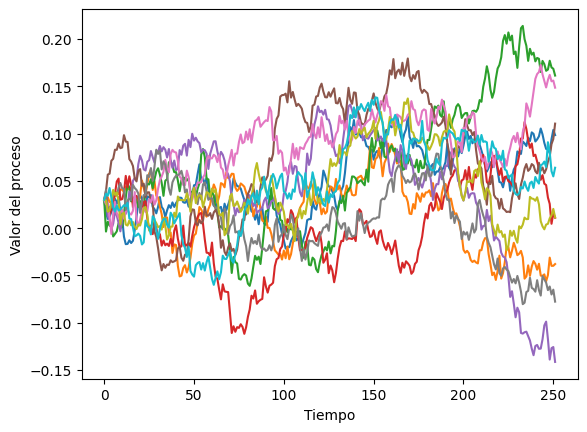

In [ ]:
def PathsOU(x0, mu, sigma, k, T, dt, NS): 

    paths = int(T/dt)
    y = np.zeros((NS, paths))
    for i in range(NS):
        x = np.zeros(paths)
        x[0] = x0
        for j in range(1, paths):
            x[j] = x[j-1] + k*(mu-x[j-1])*dt + sigma*np.sqrt(dt)*np.random.normal()
        y[i] = x
    return y

x0 = 0.03           
mu = 0.05           
sigma = 0.15       
k = 1                
T = 1               
dt = T/252      
NS = 100        # Trayectorias 

y = PathsOU(x0, mu, sigma, k, T, dt, NS)

plt.plot(np.transpose(y[:10]))
plt.xlabel("Tiempo")
plt.ylabel("Valor del proceso")
plt.show()

In [ ]:
#Valor promedio bono cero cupón 
bcc = np.mean(y[:,-1])
f = 100
v = f/(1+bcc)**T
v

95.9615153960206

5. Escoja tres de los siguientes activos.

Con la información de las series históricas para el periodo 2005-01-01 a 2022-12-31 con periodicidad mensual, construya 100 trayectorias o simulaciones para cada serie para el año 2023. Para este ejercicio tenga en cuenta que las series pueden seguir un proceso estocástico tipo MGB o de reversión a la media tipo OU.

La selección del proceso debe incorporar:
a. La gráfica de las series históricas de los precios
b. Los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)
c. Los resultados de la simulación

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

GOLD FUTURES

[*********************100%***********************]  1 of 1 completed


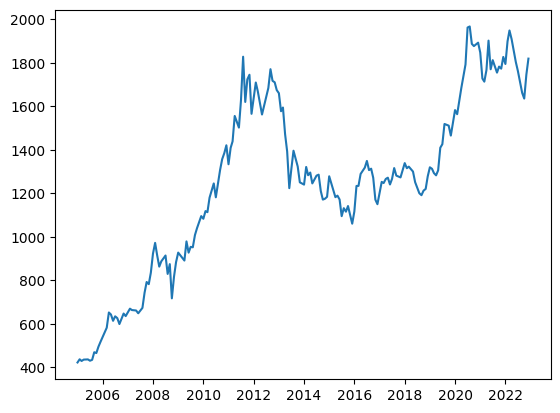

In [ ]:
precios = yf.download("GC=F", start = "2005-01-01", end = "2022-12-31", interval ="1Mo")["Adj Close"]
r = np.log(precios/precios.shift()).dropna()
plt.plot(precios)

In [ ]:
adfuller(precios)

(-1.6060966548315445,
 0.4805302690514042,
 0,
 184,
 {'1%': -3.466398230774071,
  '5%': -2.8773796387256514,
  '10%': -2.575213838610586},
 1914.1605927220924)

In [ ]:
pruebadf1 = adfuller(precios)  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.606097
P-value: 0.480530
Citical values:
	1%: -3.466398
	5%: -2.877380
	10%: -2.575214


In [ ]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M]) 
    S = np.zeros([NS, M+1])
    S[:,0] = S0 
    dt = T / M 
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

Text(0.5, 0, 'Tiempo')

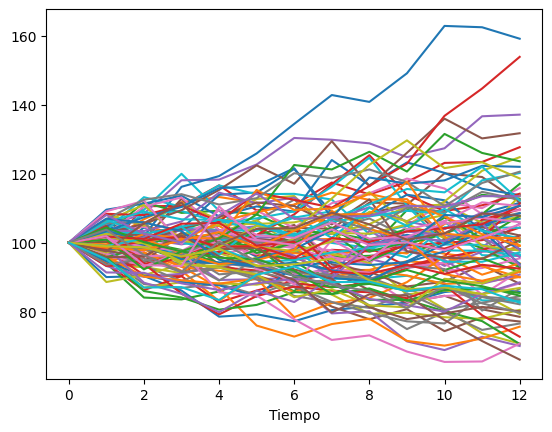

In [ ]:
T = 1 
mu = r.mean()
sigma = r.std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")

COOPER

[*********************100%***********************]  1 of 1 completed


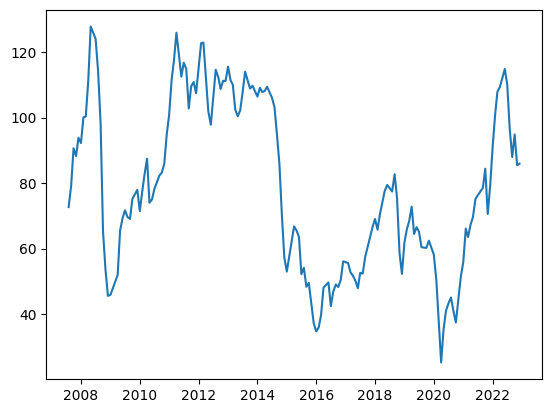

In [ ]:
precios = yf.download("BZ=F", start = "2005-01-01", end = "2022-12-31", interval ="1Mo")["Adj Close"]
r = np.log(precios/precios.shift()).dropna()
plt.plot(precios)

In [ ]:
adfuller(precios)

(-2.497246970677035,
 0.11614560429758658,
 1,
 157,
 {'1%': -3.472703119504854,
  '5%': -2.880131672353732,
  '10%': -2.5766826861130268},
 969.3351919417296)

In [ ]:
pruebadf1 = adfuller(precios) 
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -2.497247
P-value: 0.116146
Citical values:
	1%: -3.472703
	5%: -2.880132
	10%: -2.576683


Text(0.5, 0, 'Tiempo')

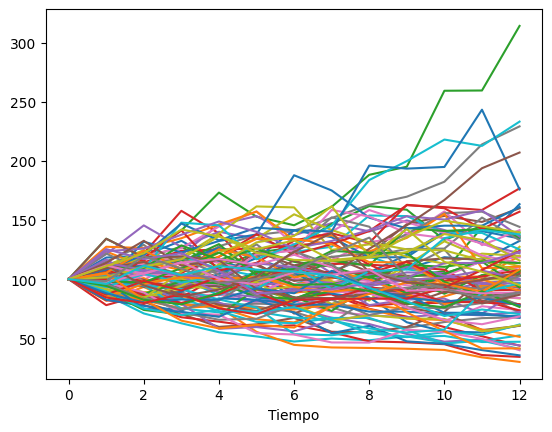

In [ ]:
T = 1 
mu = r.mean()
sigma = r.std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")

COFFEE FUTURES

[*********************100%***********************]  1 of 1 completed


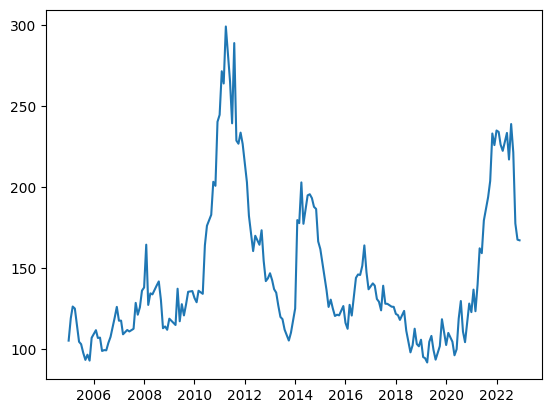

In [ ]:
precios = yf.download("KC=F", start = "2005-01-01", end = "2022-12-31", interval ="1Mo")["Adj Close"]
r = np.log(precios/precios.shift()).dropna()
plt.plot(precios)

In [ ]:
adfuller(precios)

(-3.3292558479934757,
 0.013620322296034153,
 5,
 179,
 {'1%': -3.4674201432469816,
  '5%': -2.877826051844538,
  '10%': -2.575452082332012},
 1391.1667054960749)

In [ ]:
pruebadf1 = adfuller(precios)  
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -3.329256
P-value: 0.013620
Citical values:
	1%: -3.467420
	5%: -2.877826
	10%: -2.575452


Text(0.5, 0, 'Tiempo')

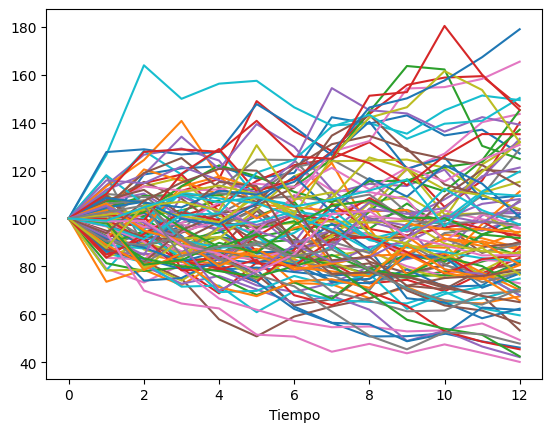

In [ ]:
T = 1 
mu = r.mean()
sigma = r.std()*np.sqrt(12)
S0 = 100
NS = 100
M = 12 
St = PathsGBM(S0,mu,sigma,T,NS,M)
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")